<a href="https://colab.research.google.com/github/karsarobert/NLP_2024/blob/main/03/NLP2024_03_01_FELADATOKKAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Természetes nyelvfeldolgozás
# PTE Gépi tanulás III.

## 1. Előadás: gyakorlati feladatok
### 2024. február 21.


In [ ]:
!pip install newsapi-python

#Pénzügyi jellegű hírek, szövegek osztályozása

https://newsapi.org/

In [ ]:
from newsapi import NewsApiClient
# Initialize the News API client
newsapi = NewsApiClient(api_key='')
try:
    # Fetch news articles related to Tesla
    all_articles = newsapi.get_everything(q='Tesla',
                                          from_param='2024-01-20',
                                          to='2024-02-10',
                                          sort_by='relevancy',
                                          language = 'en')
    # Display articles
    for article in all_articles['articles']:
        print(article['title'], article['url'], article['content'])
except Exception as e:
    print(f"An error occurred: {e}")

#Vizsgáljuk meg mi van az all_articles változóban!

'Si vous cliquez sur «\xa0Tout accepter\xa0», nos partenaires (y compris 244 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]'

#Másoljuk be egy pandas dataframe-be

In [ ]:
import pandas as pd

data =
df =pd.DataFrame(data)

'A Delaware judge struck down Elon Musks $55.8 billion pay package at Tesla after finding the CEO had extensive ties with the board members who approved his pay deal, according to the Wall Street Jour… [+2425 chars]'

#GPU ellenőrzése

In [ ]:
import torch

device = 0 if torch.cuda.is_available() else -1

#A huggingface keretrendszer pipeline segítségével készítsünk egy summarizer-t és a dataframe egy elemén teszteljük le.

In [ ]:
from transformers import pipeline

summarizer =
summarized_text =

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


#A huggingface keretrendszer pipeline segítségével készítsünk egy sentiment-analysis-t és a dataframe egy elemén teszteljük le. Milyen kimeneteket ad?

In [ ]:
classifier =


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9508268237113953}]

#Iteráljuk végig a dataframe-en az összegzőt!
Prompt: pythonban van egy dataframem aminek a description oszolopa text adatokat tartalmaz. Készíts egy scriptet ami végig ietrál a dataframe descrtiption adatain és egy új summarized nevű oszlopba átmásolja a descriptionben lévő szövegek egy összefoglalóját használd a huggingface summarization funkcióját

#Néha hibázik, NAN elemek lehetnek az dataframeben javítsuk ki
Prompt: df["summarized"] = df["description"].apply(lambda text: summarizer(text, max_length=120)[0]["summary_text"]) Egészítsd ki ezt a kódot, hogy amennyiben NAN a visszatérő érték akkor üres sztringet adjon vissza

#Ellenőrízzük le a dataframe-et

In [ ]:
df

#Iteráljuk végig a dataframe-en a hangulatelemzőt!

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


#Amennyiben a hangulat negatív szorozzuk be a score-t -1-el
Prompt: van egy dataframe amiben két oszlop van label és score, amennyiben a label értéke negatív a score értékét szorozd meg -1-el

In [ ]:
df

#Milyen volt az elmúlt időszak piaci hangulata?

In [ ]:
df.cls_score.mean()

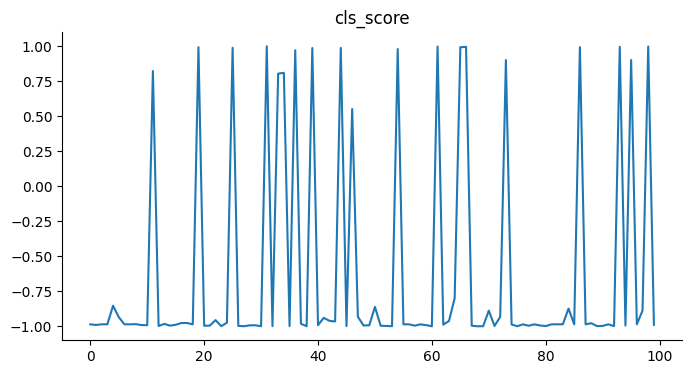

In [ ]:
from matplotlib import pyplot as plt
df['cls_score'].plot(kind='line', figsize=(8, 4), title='cls_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-18-ed993777dc63>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df, x='publishedAt', y='cls_label', palette='Dark2')


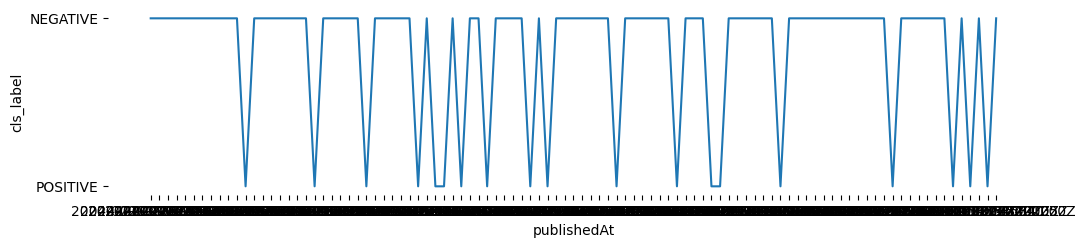

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['cls_label'].unique()))
plt.figure(figsize=figsize)
sns.lineplot(df, x='publishedAt', y='cls_label', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

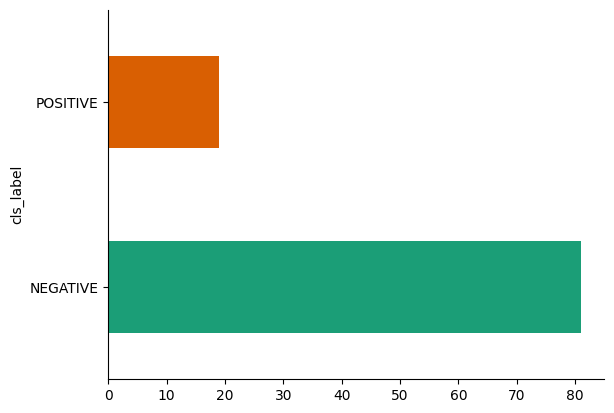

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cls_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)